<a href="https://colab.research.google.com/github/stealthOG/Skill_Lab/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras

#### Ekwe Collins Odinaka

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#### Regression Model with Keras

In [3]:
URL = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
df = pd.read_csv(URL)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

##### Split Data

In [10]:
# split the data into predictors and target
df_col = df.columns
df_col

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [11]:
predictors = df[df_col[df_col != 'Strength']] # all columns except Strength
target = df['Strength'] # Strength column

In [12]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [13]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
predictor_norm = scaler.fit_transform(predictors)
predictor_norm = pd.DataFrame(predictor_norm, columns=predictors.columns)
predictor_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [45]:
n_cols = predictor_norm.shape[1]

##### Build a Neural Network


In [84]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

    # The above function create a model that has three hidden layers, each of 50 hidden units.


In [64]:
# lets create an instance of our model
model = regression_model()

##### Train Test Model

Next, we will train and test the model at the same time using the fit method. We will leave out 30% of the data for validation and we will train the model for 100 epochs(iterations).

In [ ]:
# fit the model
model.fit(predictor_norm, target, validation_split=0.3, epochs=1000, verbose=2)

#### Classification Model With Keras

For the classification model, i will be using the MNIST dataset present in the Keras library. it contains images that will be used for the classification model.


In [67]:
from keras.datasets import mnist

In [68]:
 # read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [69]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

In [70]:
X_test.shape

(10000, 28, 28)

Let's visualize the first image in the training set using Matplotlib's scripting layer.

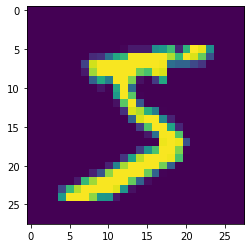

In [71]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [72]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [73]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [74]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

To build a model for classification we need to divide our target variable into categories. The to_categorical function from the Keras Utilities package will be used.

In [75]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


##### Build a Neural Network

In [76]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [77]:
# lets create an instance of our model
model = classification_model()

In [78]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 15s - loss: 0.1840 - accuracy: 0.9437 - val_loss: 0.0974 - val_accuracy: 0.9701 - 15s/epoch - 8ms/step
Epoch 2/10
1875/1875 - 14s - loss: 0.0801 - accuracy: 0.9747 - val_loss: 0.0745 - val_accuracy: 0.9777 - 14s/epoch - 7ms/step
Epoch 3/10
1875/1875 - 14s - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0743 - val_accuracy: 0.9775 - 14s/epoch - 7ms/step
Epoch 4/10
1875/1875 - 15s - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0737 - val_accuracy: 0.9782 - 15s/epoch - 8ms/step
Epoch 5/10
1875/1875 - 17s - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0860 - val_accuracy: 0.9762 - 17s/epoch - 9ms/step
Epoch 6/10
1875/1875 - 16s - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0765 - val_accuracy: 0.9799 - 16s/epoch - 8ms/step
Epoch 7/10
1875/1875 - 16s - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.1005 - val_accuracy: 0.9749 - 16s/epoch - 8ms/step
Epoch 8/10
1875/1875 - 16s - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0910 - val_accuracy: 0.9790 - 16s/epoch - 8

In [80]:
# lets print the accuracy and corresponding error
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9833999872207642% 
 Error: 0.01660001277923584


In [82]:
# save model in the keras library
model.save('odi_classification_model.h5')

In [83]:
from keras.models import load_model
pretrained_model = load_model('odi_classification_model.h5')